# What is this notebook used for?

The purpose of this notebook is to give an idea of the performance that a useful model could achieve. 

**But first, what's a useful model ?**

For our binary classification task (tell if a character belong to the horde or the alliance), a useful model is a better model than a simple rule like the prediction of the majority class. The proportion of the majority class of the training set in the test set is therefore the lower bound of a useful classification model.

On the other hand the races belonging to the 2 factions are not all totally distinct, e.g. pandarans are available in both factions. These particular cases will therefore constitute an unavoidable error, and therefore an upper bound of the performance of future classification models

# How is it done?

I make simple descriptive statistics of the database and display some pictures to illustrate these arguments.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2 as cv

from collections import Counter

# Faction distributions 

## Training set

Percentage of characters belonging to the horde :
 64.76 %
 Percentage of characters belonging to the alliance :
 35.24 %


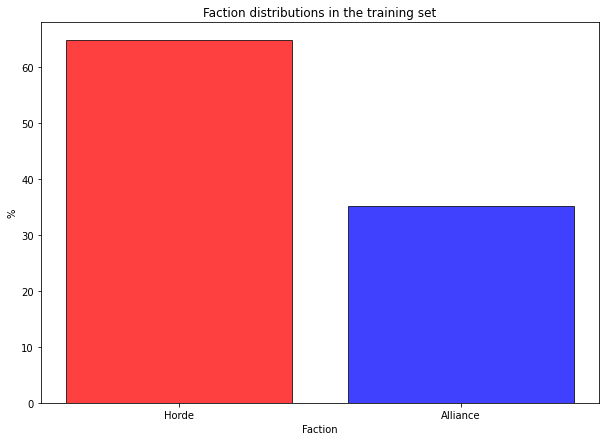

In [2]:
# Path were the training images are stored
path_horde = "Data/With_background/train/horde"
path_alliance = "Data/With_background/train/alliance"

# Number of images per faction
nb_images_train_horde = len(os.listdir(path_horde))
nb_images_train_alliance = len(os.listdir(path_alliance))
# Total number of images in the training set
nb_charac_train = nb_images_train_horde + nb_images_train_alliance

# faction's names
col_names = ["Horde", "Alliance"]
# Percentage of characters per faction
col_values_percentage = 100*np.array([nb_images_train_horde, nb_images_train_alliance]) / nb_charac_train

# Plot the distribution
plt.figure(figsize=(10, 7))
plt.title("Faction distributions in the training set")
plt.bar(col_names, col_values_percentage, edgecolor = 'black',
       color = ['red', 'blue'], alpha=0.75)
plt.xlabel("Faction")
plt.ylabel("%")

# Print percentages
print("Percentage of characters belonging to the horde :\n", round(col_values_percentage[0], 2), "%\n",
     "Percentage of characters belonging to the alliance :\n", round(col_values_percentage[1], 2), "%")

The above distribution of the images contained in the training set shows that **64.76% characters belong to the horde**. 

This is an essential piece of information because if we use **a very simple model that only predicts the majority class in the training set, then it will predict the horde faction for all the images.**


More informations about "Baseline estimators" here : 
- https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html
- https://machinelearningmastery.com/how-to-know-if-your-machine-learning-model-has-good-performance/

How would such a model perform on the test set? 

Let's take a look at it right now!

## Test set

In [3]:
# Path were the test images are stored
path_horde = "Data/With_background/test/horde"
path_alliance = "Data/With_background/test/alliance"

# Number of images per faction
nb_images_test_horde = len(os.listdir(path_horde))
nb_images_test_alliance = len(os.listdir(path_alliance))
# Total number of images in the training set
nb_charac_test = nb_images_test_horde + nb_images_test_alliance

# faction's names
col_names = ["Horde", "Alliance"]
# Percentage of characters per faction
col_values_percentage = 100*np.array([nb_images_test_horde, nb_images_test_alliance]) / nb_charac_test

# Print percentages
print("Percentage of characters belonging to the horde :\n", round(col_values_percentage[0], 2), "%\n",
     "Percentage of characters belonging to the alliance :\n", round(col_values_percentage[1], 2), "%")

Percentage of characters belonging to the horde :
 65.09 %
 Percentage of characters belonging to the alliance :
 34.91 %


We can therefore see that using the simple rule of prediction of the majority class of the training set leads to **an accuracy of 65.09% on the test set.**

This is the baseline of the faction classification task using images with background !

Now that **we have the lower bound** of the models family, we can try to estimate the **irreducible error present in the dataset (the upper bound).**

There are 3 races that can be problematics for this image classification task :
- pandarens : it is a race available both in the horde and in the alliance
- blood elf and void elf : these 2 races have the same model, only certain physical characteristics distinguish them (skin and eye colours), if a character wears armour you can't see them

More informations here : https://worldofwarcraft.com/en-us/game/races

## Pandarens 

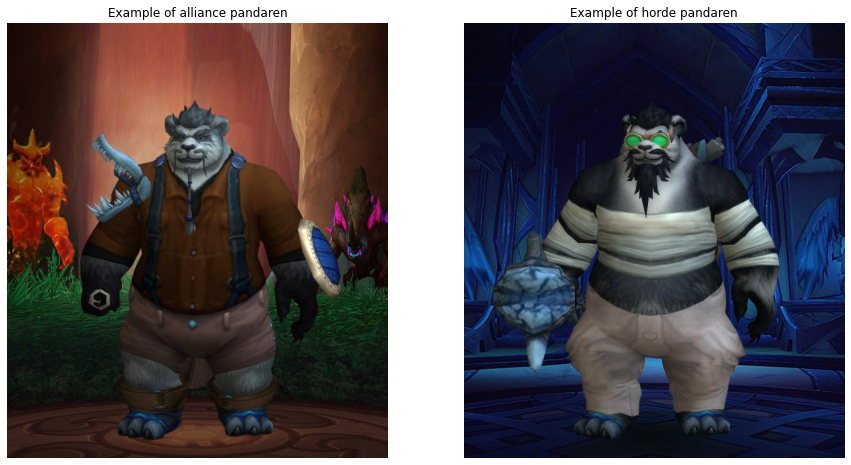

In [4]:
# Examples of 1 pandaren in each faction
panda_ally = cv.imread("Data/With_background/train/alliance/fettehupe-blackmoore.jpg")
panda_h2 = cv.imread("Data/With_background/train/horde/executebtw-kazzak.jpg")

# image's plot
plt.figure(figsize=(15, 15))
ax1 = plt.subplot(1, 2, 1)
plt.imshow(panda_ally)
plt.title("Example of alliance pandaren") 
plt.axis("off")
ax2 = plt.subplot(1, 2, 2)
plt.imshow(panda_h2)
plt.title("Example of horde pandaren")
plt.axis("off")
plt.show()

The above examples show that there is no difference between a pandaren of the alliance and the horde (the difference in skin colour, beard, and hairstyle comes from the customisation of the characters in game, it is available for the 2 factions).

## Blood and void elf

First, let's look the differences of these 2 races.

Link to for the opencv explications : https://stackoverflow.com/questions/39316447/opencv-giving-wrong-color-to-colored-images-on-loading

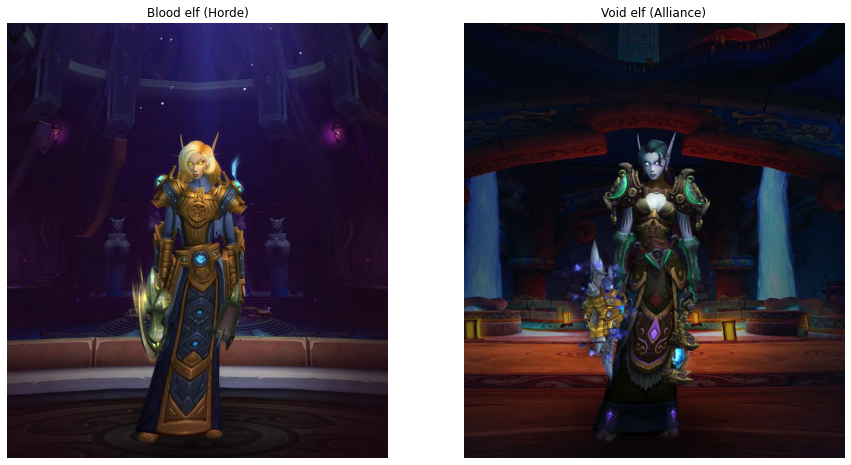

In [5]:
# Load images
blood_elf = cv.imread("Data/With_background/train/horde/eryina-burning-legion.jpg")
void_elf = cv.imread("Data/With_background/train/alliance/healowkitty-dalaran.jpg")

# we need to specify to opencv the color (RGB) 
blood_elf = cv.cvtColor(blood_elf, cv.COLOR_BGR2RGB)
void_elf = cv.cvtColor(void_elf, cv.COLOR_BGR2RGB)

# PLot images
plt.figure(figsize=(15, 15))
ax1 = plt.subplot(1, 2, 1)
plt.imshow(blood_elf)
plt.title("Blood elf (Horde)")
plt.axis("off")
ax2 = plt.subplot(1, 2, 2)
plt.imshow(void_elf)
plt.title("Void elf (Alliance)")
plt.axis("off")
plt.show()

As can be seen above, if the faces of these figures appear, then a difference in eye and skin colour can be seen. 

**But what if we can't see them ?**

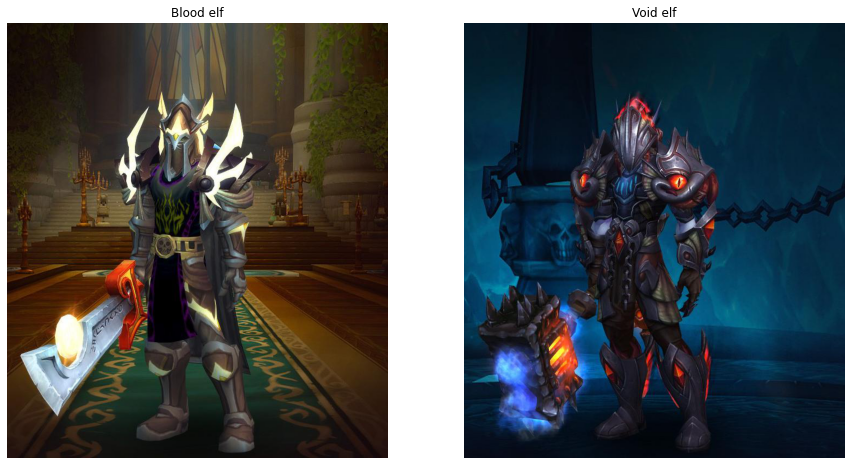

In [6]:
# Load images
blood_elf = cv.imread("Data/With_background/train/horde/falcreon-wildhammer.jpg")
void_elf = cv.imread("Data/With_background/train/alliance/rork-elune.jpg")

# we need to specify to opencv the color 
blood_elf = cv.cvtColor(blood_elf, cv.COLOR_BGR2RGB)
void_elf = cv.cvtColor(void_elf, cv.COLOR_BGR2RGB)

# PLot images
plt.figure(figsize=(15, 15))
ax1 = plt.subplot(1, 2, 1)
plt.imshow(blood_elf)
plt.title("Blood elf") 
plt.axis("off")
ax2 = plt.subplot(1, 2, 2)
plt.imshow(void_elf)
plt.title("Void elf")
plt.axis("off")
plt.show()

When we can't see the skin or the face of the character it is not possible to distinguish whether it's a void elf or a blood elf.

# Proportion of problematic images

In [7]:
# import the dataframe with character's informations for the database with background
df = pd.read_csv("Data/DB_with_BG.csv", header=0, sep=";", 
                 names=["Rank", "Guild", "Realm", "ItemsLvl", "name",
                        "class", "faction", "gender", "race", 
                        "url_with_background", "url_character", "ID"])

# Mix the rows before split (use the same random_state that before !)
df = df.sample(frac=1, random_state=0)

In [8]:
# Number of characters by race
counter_race = Counter(df["race"])

Number of pandarens :  2.59 %
Number of blood-elf :  26.05 %
Number of void-elf :  2.45 %


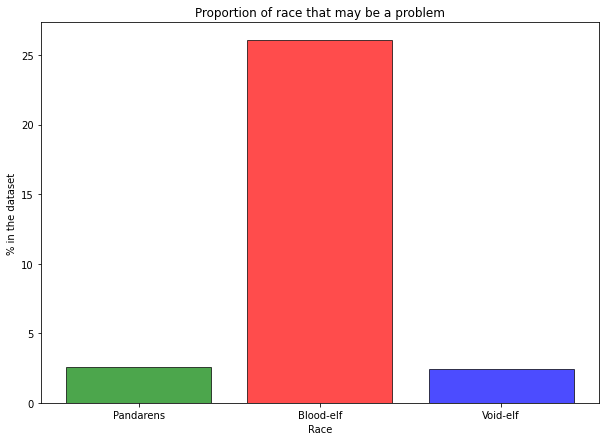

In [9]:
# Number of images per race for problematics races
nb_pandas = counter_race["pandaren"]
nb_be = counter_race["blood-elf"]
nb_ve = counter_race["void-elf"]

# Total number of images 
total_img = df.shape[0]

col_names = ["Pandarens", "Blood-elf", "Void-elf"]
# Percentage of characters per faction
col_values_percentage = 100*np.array([nb_pandas, nb_be, nb_ve]) / total_img

# Plot the distribution
plt.figure(figsize=(10, 7))
plt.title("Proportion of race that may be a problem")
plt.bar(col_names, col_values_percentage, edgecolor = 'black', color=["g", "r", "b"],
       alpha=0.7)
plt.ylabel("% in the dataset")
plt.xlabel("Race")

# Print percentages
print("Number of pandarens : ", round(col_values_percentage[0], 2), "%")
print("Number of blood-elf : ", round(col_values_percentage[1], 2), "%")
print("Number of void-elf : ", round(col_values_percentage[2], 2), "%")

# Conclusion

After a manual analysis of the base I could see that the cases where one could not see the face of the elves characters were rare, the problem of classifying elves in armour is therefore rare.
**As a rule there is therefore a visible difference between blood elves and void elves.**

As far as pandarens are concerned there is no visible way to distinguish the faction from the character except in very rare cases where the character wears an emblem of the faction (I don't know if there are any in the base).

**It can therefore be considered that the 2.59% of pandarens could be a problem for a classification model**, we will see if the model manages to correctly classify pandarens !

A good classification model could therefore classify all breeds except pandarans, an upper bound of the performance to be aimed for can therefore be around **97-98%** of correctly identified images.


**This notebook has highlighted an essential piece of information in a Machine Learning project: the space in which a successful model must be located. 
The continuation of this project will allow us to develop different models and to compare them to the 2 terminals bounds in this part.**